# Task2 :  Credit Card Fraud
  

# Approach & Process:

###  1. Data Gathering
###  2. Data Cleaning 
###  3. Data Visualization and Exploration
###  4. Data Preprocessing
###  5. Model Selection and Fine-Tuning or Training, Optimization, and Validation

# Import necessary libraries


In [66]:
## Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder , StandardScaler 
from sklearn.compose import ColumnTransformer 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report ,confusion_matrix ,precision_score ,recall_score
from imblearn.over_sampling import RandomOverSampler
from datetime import datetime
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler


# 1. Data Gathering:


In [4]:
train_df = pd.read_csv("./CREDIT CARD FRAUD Dataset/fraudTrain.csv")
test_df = pd.read_csv("./CREDIT CARD FRAUD Dataset/fraudTest.csv")

In [7]:
train_df.head(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0


In [8]:
train_df.shape

(1296675, 23)

In [9]:
test_df.head(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0


In [10]:
test_df.shape

(555719, 23)

In [12]:
## Basic info on data set
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [13]:
## Basic info on data set
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [16]:
## Check basic statistic
train_df.describe(include = "all")

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1296675,1.296675e+06,1296675,1296675,1.296675e+06,1296675,1296675,1296675,1296675,...,1.296675e+06,1.296675e+06,1.296675e+06,1296675,1296675,1296675,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
unique,NaN,1274791,NaN,693,14,NaN,352,481,2,983,...,NaN,NaN,NaN,494,968,1296675,NaN,NaN,NaN,NaN
top,NaN,2019-04-22 16:02:01,NaN,fraud_Kilback LLC,gas_transport,NaN,Christopher,Smith,F,0069 Robin Brooks Apt. 695,...,NaN,NaN,NaN,Film/video editor,1977-03-23,0b242abb623afc578575680df30655b9,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,4403,131659,NaN,26669,28794,709863,3123,...,NaN,NaN,NaN,9779,5636,1,NaN,NaN,NaN,NaN
mean,6.483370e+05,NaN,4.171920e+17,NaN,NaN,7.035104e+01,NaN,NaN,NaN,NaN,...,3.853762e+01,-9.022634e+01,8.882444e+04,NaN,NaN,NaN,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,NaN,1.308806e+18,NaN,NaN,1.603160e+02,NaN,NaN,NaN,NaN,...,5.075808e+00,1.375908e+01,3.019564e+05,NaN,NaN,NaN,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,NaN,6.041621e+10,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,...,2.002710e+01,-1.656723e+02,2.300000e+01,NaN,NaN,NaN,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,NaN,1.800429e+14,NaN,NaN,9.650000e+00,NaN,NaN,NaN,NaN,...,3.462050e+01,-9.679800e+01,7.430000e+02,NaN,NaN,NaN,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,NaN,3.521417e+15,NaN,NaN,4.752000e+01,NaN,NaN,NaN,NaN,...,3.935430e+01,-8.747690e+01,2.456000e+03,NaN,NaN,NaN,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,NaN,4.642255e+15,NaN,NaN,8.314000e+01,NaN,NaN,NaN,NaN,...,4.194040e+01,-8.015800e+01,2.032800e+04,NaN,NaN,NaN,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00


# 2. Data Cleaning 
    In the Data Cleaning  step, the dataset undergoes essential operations:

1. **Removing Duplicates:**
   Identical entries are eliminated, ensuring each data point is unique.

2. **Removing NaN Rows and Columns:**
   Rows and columns with missing values are deleted, ensuring data integrity.


In [17]:
## Check for Duplicates and Remove them
train_df.duplicated().sum() ## Will give us a number of duplicates


0

In [18]:
## Check for Duplicates and Remove them
test_df.duplicated().sum() ## Will give us a number of duplicates


0

In [19]:
## Check for nan values

train_df.isna().sum()  # Will check for any duplicates


Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [20]:
## Check for nan values

test_df.isna().sum()  # Will check for any duplicates


Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [21]:
## Chheck for values which have unique values in them
for column_name in train_df.columns:
    unique_values = train_df[column_name].nunique()
    print(f'Unique values in column {column_name}: {unique_values}')

Unique values in column Unnamed: 0: 1296675
Unique values in column trans_date_trans_time: 1274791
Unique values in column cc_num: 983
Unique values in column merchant: 693
Unique values in column category: 14
Unique values in column amt: 52928
Unique values in column first: 352
Unique values in column last: 481
Unique values in column gender: 2
Unique values in column street: 983
Unique values in column city: 894
Unique values in column state: 51
Unique values in column zip: 970
Unique values in column lat: 968
Unique values in column long: 969
Unique values in column city_pop: 879
Unique values in column job: 494
Unique values in column dob: 968
Unique values in column trans_num: 1296675
Unique values in column unix_time: 1274823
Unique values in column merch_lat: 1247805
Unique values in column merch_long: 1275745
Unique values in column is_fraud: 2


In [22]:
## Chheck for values which have unique values in them
for column_name in test_df.columns:
    unique_values = train_df[column_name].nunique()
    print(f'Unique values in column {column_name}: {unique_values}')

Unique values in column Unnamed: 0: 1296675
Unique values in column trans_date_trans_time: 1274791
Unique values in column cc_num: 983
Unique values in column merchant: 693
Unique values in column category: 14
Unique values in column amt: 52928
Unique values in column first: 352
Unique values in column last: 481
Unique values in column gender: 2
Unique values in column street: 983
Unique values in column city: 894
Unique values in column state: 51
Unique values in column zip: 970
Unique values in column lat: 968
Unique values in column long: 969
Unique values in column city_pop: 879
Unique values in column job: 494
Unique values in column dob: 968
Unique values in column trans_num: 1296675
Unique values in column unix_time: 1274823
Unique values in column merch_lat: 1247805
Unique values in column merch_long: 1275745
Unique values in column is_fraud: 2


In [23]:
## Drop unneccesary columns like unnamed:0
dropColumn =["Unnamed: 0","job" ,"cc_num","trans_num","zip" ,"unix_time","merch_lat","merch_long","dob","first","last","street","city"] 
train_df.drop(dropColumn,axis = 1,inplace = True)
test_df.drop(dropColumn,axis = 1,inplace = True)

In [24]:
train_df.head(3)

,trans_date_trans_time,merchant,category,amt,gender,state,lat,long,city_pop,is_fraud
0,2019-01-01 00:00:18,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,NC,36.0788,-81.1781,3495,0
1,2019-01-01 00:00:44,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,WA,48.8878,-118.2105,149,0
2,2019-01-01 00:00:51,fraud_Lind-Buckridge,entertainment,220.11,M,ID,42.1808,-112.2620,4154,0


In [25]:
test_df.head(3)

,trans_date_trans_time,merchant,category,amt,gender,state,lat,long,city_pop,is_fraud
0,2020-06-21 12:14:25,fraud_Kirlin and Sons,personal_care,2.86,M,SC,33.9659,-80.9355,333497,0
1,2020-06-21 12:14:33,fraud_Sporer-Keebler,personal_care,29.84,F,UT,40.3207,-110.4360,302,0
2,2020-06-21 12:14:53,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,NY,40.6729,-73.5365,34496,0


In [27]:
## Create a fuction convert the trans_time_into day of week
def datetoDay(time):
    timestamp = datetime.strptime(time, "%Y-%m-%d %H:%M:%S")

    # Get the day of the week as a string
    day_of_week = timestamp.strftime("%A")
    return day_of_week

In [28]:
## Apply the conversion on each sample of test and train
train_df["trans_date_trans_time"] = train_df["trans_date_trans_time"].apply(datetoDay)
test_df["trans_date_trans_time"] = test_df["trans_date_trans_time"].apply(datetoDay)

In [29]:
train_df.head(3)

,trans_date_trans_time,merchant,category,amt,gender,state,lat,long,city_pop,is_fraud
0,Tuesday,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,NC,36.0788,-81.1781,3495,0
1,Tuesday,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,WA,48.8878,-118.2105,149,0
2,Tuesday,fraud_Lind-Buckridge,entertainment,220.11,M,ID,42.1808,-112.2620,4154,0


In [30]:
test_df.head(3)

,trans_date_trans_time,merchant,category,amt,gender,state,lat,long,city_pop,is_fraud
0,Sunday,fraud_Kirlin and Sons,personal_care,2.86,M,SC,33.9659,-80.9355,333497,0
1,Sunday,fraud_Sporer-Keebler,personal_care,29.84,F,UT,40.3207,-110.4360,302,0
2,Sunday,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,NY,40.6729,-73.5365,34496,0


# 3. Data Visualization and Exploration
    In this step, we'll analyze the dataset using histograms and bar charts to understand numerical and categorical distributions.

In [32]:
# Concatenating train_df and test_df into a single datafram
df = pd.concat([train_df, test_df], ignore_index=True)


In [33]:
df.head(10)

,trans_date_trans_time,merchant,category,amt,gender,state,lat,long,city_pop,is_fraud
0,Tuesday,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,NC,36.0788,-81.1781,3495,0
1,Tuesday,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,WA,48.8878,-118.2105,149,0
2,Tuesday,fraud_Lind-Buckridge,entertainment,220.11,M,ID,42.1808,-112.2620,4154,0
3,Tuesday,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,MT,46.2306,-112.1138,1939,0
4,Tuesday,fraud_Keeling-Crist,misc_pos,41.96,M,VA,38.4207,-79.4629,99,0
5,Tuesday,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,F,PA,40.3750,-75.2045,2158,0
6,Tuesday,fraud_Rowe-Vandervort,grocery_net,44.54,F,KS,37.9931,-100.9893,2691,0
7,Tuesday,fraud_Corwin-Collins,gas_transport,71.65,M,VA,38.8432,-78.6003,6018,0
8,Tuesday,fraud_Herzog Ltd,misc_pos,4.27,F,PA,40.3359,-79.6607,1472,0
9,Tuesday,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,F,TN,36.5220,-87.3490,151785,0


In [57]:
df.shape

(1852394, 10)

## 3. Transaction Category Distribution:

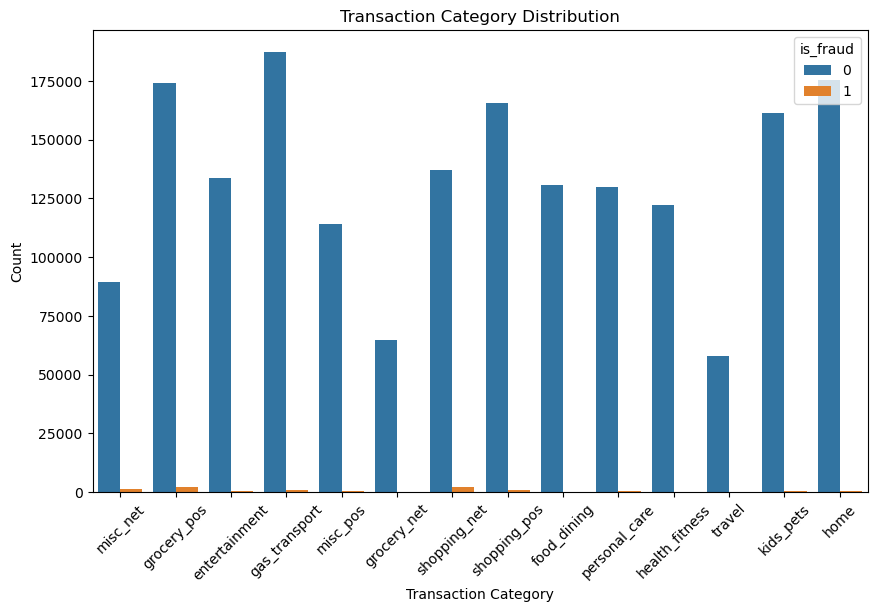

In [38]:
plt.figure(figsize=(10, 6))
sns.countplot(x='category', hue='is_fraud', data=df)
plt.xlabel('Transaction Category')
plt.ylabel('Count')
plt.title('Transaction Category Distribution')
plt.xticks(rotation=45)
plt.show()


## 5. Transaction Frequency per Day:

## 6. Transaction Frequency per State:

## 7. Average Transaction Amount for Fraud vs. Non-Fraud:

## 8. Transaction Category vs. Amount:

## 9. City Population vs. Fraud Occurrence:

## 10. Transaction Location (Latitude and Longitude):

# 4. Data Preprocessing

# Imbalance Data

In [52]:
x_train = train_df.drop("is_fraud" ,axis = 1)
y_train = train_df["is_fraud"]

x_test = test_df.drop("is_fraud" ,axis = 1)
y_test = test_df["is_fraud"]


categorical = ["trans_date_trans_time","merchant","category","gender","state"]
numeric = ["amt","lat" ,"long" ,"city_pop"]


# Initialize the encoder with handle_unknown='ignore'
encoder = OneHotEncoder(handle_unknown='ignore')
scaler = StandardScaler()

transformer = ColumnTransformer(transformers = [("categorical",encoder ,categorical),
                                            ("num",scaler,numeric)],remainder="passthrough")
x_train = transformer.fit_transform(x_train)
x_test = transformer.transform(x_test)

In [53]:
x_train.shape

(1296675, 771)

In [54]:
x_test.shape

(555719, 771)

In [55]:
y_train.shape

(1296675,)

In [56]:
y_test.shape

(555719,)

# 5. Model Selection and Fine-Tuning or Training, Optimization, and Validation



In [58]:
class_names = [0, 1]
print(class_names)


[0, 1]


In [59]:
df.head(10)

,trans_date_trans_time,merchant,category,amt,gender,state,lat,long,city_pop,is_fraud
0,Tuesday,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,NC,36.0788,-81.1781,3495,0
1,Tuesday,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,WA,48.8878,-118.2105,149,0
2,Tuesday,fraud_Lind-Buckridge,entertainment,220.11,M,ID,42.1808,-112.2620,4154,0
3,Tuesday,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,MT,46.2306,-112.1138,1939,0
4,Tuesday,fraud_Keeling-Crist,misc_pos,41.96,M,VA,38.4207,-79.4629,99,0
5,Tuesday,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,F,PA,40.3750,-75.2045,2158,0
6,Tuesday,fraud_Rowe-Vandervort,grocery_net,44.54,F,KS,37.9931,-100.9893,2691,0
7,Tuesday,fraud_Corwin-Collins,gas_transport,71.65,M,VA,38.8432,-78.6003,6018,0
8,Tuesday,fraud_Herzog Ltd,misc_pos,4.27,F,PA,40.3359,-79.6607,1472,0
9,Tuesday,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,F,TN,36.5220,-87.3490,151785,0


### DecisionTreeClassifier

In [60]:

mnb = DecisionTreeClassifier()
mnb.fit(x_train, y_train)

# Evaluate the model
train_accuracy = mnb.score(x_train, y_train)
test_accuracy = mnb.score(x_test, y_test)

# Print model accuracy
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

# Make predictions and display classification report
y_pred = mnb.predict(x_test)
class_report = classification_report(y_test, y_pred)

print("Classification Report:\n", class_report)




Training Accuracy: 1.00
Test Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.53      0.57      0.55      2145

    accuracy                           1.00    555719
   macro avg       0.76      0.79      0.77    555719
weighted avg       1.00      1.00      1.00    555719



- **Model Choice :**
  - Decision Tree Classifier 
- **Accuracy:**
  - Training Accuracy: 1.00 (Perfect fit to training data).
  - Test Accuracy: 1.00 (Perfect fit to test data).


### LogisticRegression

In [62]:

model = LogisticRegression()
model.fit(x_train ,y_train)
print("Model Score on Training data",model.score(x_train ,y_train))
print("Model Score on Testing data",model.score(x_test ,y_test))
y_pred = model.predict(x_test)
print(classification_report(y_pred ,y_test))



E:\Anaconda1\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Score on Training data 0.9936823028129639
Model Score on Testing data 0.995531914510751
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    555379
           1       0.00      0.00      0.00       340

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       1.00      1.00      1.00    555719



- **Model:** Logistic Regression
- **Training Data Accuracy:** 99.37%
- **Testing Data Accuracy:** 99.55%


### RandomForestClassifier

In [64]:
# Create a Random Forest model
random_forest = RandomForestClassifier()

random_forest.fit(x_train, y_train)
print("Random Forest - Train Score:",random_forest.score(x_train, y_train))
print("Random Forest - Test Score:", random_forest.score(x_test, y_test))

y_pred = random_forest.predict(x_test)
print(classification_report(y_pred ,y_test))




Random Forest - Train Score: 0.9999969151869204
Random Forest - Test Score: 0.9973673745184167
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    554683
           1       0.40      0.83      0.54      1036

    accuracy                           1.00    555719
   macro avg       0.70      0.91      0.77    555719
weighted avg       1.00      1.00      1.00    555719



- **Model:** Random Forest
- **Training Data Accuracy:** 99.99%
- **Testing Data Accuracy:** 99.74%


## Conclusion:

**Choosing the Best Model for Imbalanced Data**

The **Random Forest** model stands out as the better choice for handling imbalanced data in fraud detection. However, it's essential to continue refining the model by addressing the class imbalance issue further. Techniques like oversampling the minority class and experimenting with hyperparameters can lead to a more accurate and reliable fraud detection system. Regular monitoring and updates based on changing data patterns are also crucial for maintaining the model's effectiveness over time.

## Balance Data  using UnderSampling

In [67]:
sampler = RandomUnderSampler()

x_train = train_df.drop("is_fraud" ,axis = 1)
y_train = train_df["is_fraud"]

x_test = test_df.drop("is_fraud" ,axis = 1)
y_test = test_df["is_fraud"]

x_sampled ,y_sampled =sampler.fit_resample(x_train ,y_train) 

categorical = ["trans_date_trans_time","merchant","category","gender","state"]
numeric = ["amt","lat" ,"long" ,"city_pop"]



# Initialize the encoder with handle_unknown='ignore'
encoder = OneHotEncoder(handle_unknown='ignore')
scaler = StandardScaler()

transformer = ColumnTransformer(transformers = [("categorical",encoder ,categorical),
                                            ("num",scaler,numeric)],remainder="passthrough")
x_train = transformer.fit_transform(x_sampled)
x_test = transformer.transform(x_test)


In [68]:
y_sampled.value_counts()

is_fraud
0    7506
1    7506
Name: count, dtype: int64

The output shows that after random undersampling, both classes in the dataset (fraudulent and non-fraudulent transactions) have an equal number of samples (7506 instances each). This balanced distribution ensures fairness and unbiased representation of both classes in the dataset, enhancing the reliability of predictive models.

In [69]:
x_train.shape

(15012, 771)

In [70]:
x_test.shape

(555719, 771)

In [71]:
y_sampled.shape

(1296675,)

In [72]:
y_test.shape

(555719,)

#  Model Selection and Fine-Tuning or Training, Optimization, and Validation

**Logistic Regression Model (with Undersampled Data):**

- **Training Data Accuracy:** Achieved a perfect fit to the undersampled training data.
- **Testing Data Accuracy:** Scored 95% accuracy on the test data.
- **Precision (Class 1):** 7%, indicating many false positives.
- **Recall (Class 1):** 95%, suggesting effective fraud detection.
- **F1-Score (Class 1):** 14%, balancing precision and recall.
- **Summary:** The model detects a significant portion of fraud (95%) but with many false alarms (low precision). Further optimization is needed for a better balance between precision and recall, reducing the false positive rate for fraud detection.

## RandomForestClassifier

In [78]:
# Create a Random Forest model
random_forest1 = RandomForestClassifier()

random_forest1.fit(x_train, y_sampled)
print("Random Forest - Train Score:",random_forest1.score(x_train, y_sampled))
print("Random Forest - Test Score:", random_forest1.score(x_test, y_test))

y_pred = random_forest1.predict(x_test)
print(classification_report(y_pred ,y_test))




Random Forest - Train Score: 1.0
Random Forest - Test Score: 0.9726786379447167
              precision    recall  f1-score   support

           0       0.97      1.00      0.99    538929
           1       0.87      0.11      0.20     16790

    accuracy                           0.97    555719
   macro avg       0.92      0.56      0.59    555719
weighted avg       0.97      0.97      0.96    555719



## Balance data using Oversampling

In [83]:
## Oversampling
oversampler = RandomOverSampler()

x_train = train_df.drop("is_fraud" ,axis = 1)
y_train = train_df["is_fraud"]

x_test = test_df.drop("is_fraud" ,axis = 1)
y_test = test_df["is_fraud"]

x_sampled1,y_sampled1 =oversampler.fit_resample(x_train ,y_train) 

categorical = ["trans_date_trans_time","merchant","category","gender","state"]
numeric = ["amt","lat" ,"long" ,"city_pop"]



# Initialize the encoder with handle_unknown='ignore'
encoder = OneHotEncoder(handle_unknown='ignore')
scaler = StandardScaler()

transformer = ColumnTransformer(transformers = [("cat",encoder ,categorical),
                                            ("num",scaler,numeric)],remainder="passthrough")
x_train = transformer.fit_transform(x_sampled1)
x_test = transformer.transform(x_test)

In [84]:
y_sampled1.value_counts()

is_fraud
0    1289169
1    1289169
Name: count, dtype: int64

In [85]:
x_train.shape

(2578338, 771)

In [86]:
x_test.shape

(555719, 771)

In [87]:
y_sampled1.shape

(2578338,)

In [88]:
y_test.shape

(555719,)

## Model Selection and Fine-Tuning or Training, Optimization, and Validation

## DecisionTreeClassifier

- **Model:** Decision Tree Classifier (Oversampled Data)
- **Training Accuracy:** 100% (Perfect fit to the oversampled training data)
- **Test Accuracy:** 100% (Perfect fit to the test data)
- **Precision (Class 1):** 7% (Low precision, high false positives)
- **Recall (Class 1):** 87% (Moderate recall, indicating decent fraud case coverage)
- **F1-Score (Class 1):** 13% (Low balance between precision and recall)
- **Summary:** Although the model achieved 100% accuracy, it has a low precision rate, indicating a high number of false positives. The recall is moderate, suggesting reasonable fraud case coverage. However, the low F1-score indicates a need for better balance between precision and recall for effective fraud detection.

# Deployment 

In [96]:
# Prepare a new data point for prediction
new_data = {
    'trans_date_trans_time': 'Tuesday',  
    'merchant': 'fraud_Rippin, Kub and Mann',
    'category': 'misc_net',
    'amt': 10.0,
    'gender': 'F',
    'state': 'NY',
    'lat': 40.7128,
    'long': -74.0060,
    'city_pop': 8175133
}



In [98]:
# Preprocess the input data
new_data_df = pd.DataFrame([new_data])
new_data_df

,trans_date_trans_time,merchant,category,amt,gender,state,lat,long,city_pop
0,Tuesday,"fraud_Rippin, Kub and Mann",misc_net,10.0,F,NY,40.7128,-74.006,8175133


In [99]:
new_data_transformed = transformer.transform(new_data_df)

In [100]:
# Make predictions
predicted_labels = random_forest2.predict(new_data_transformed)
print("Predicted Labels:", predicted_labels)

Predicted Labels: [0]


## Thank You! 😊🙌
## We appreciate your time and attention!